In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [4]:
import wget

wget.download('https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv')


'FuelConsumptionCo2.csv'

In [6]:
#Ler o dataset
df = pd.read_csv('FuelConsumptionCo2.csv')


#Exibir as cinco primeiras linhas do dataset
print(df.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [7]:
#Detalhar o dataset
print(df.describe())

       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

In [8]:
#Pegar somente algumas colunas/classes
motores = df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]
print(motores.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


In [9]:
#Criando os dataset de teste e de treino
#test_size -> tamanho do teste sera 20% (0.2)
#random_state ->
motores_treino, motores_teste, co2_treino, co2_teste = train_test_split(motores, co2, test_size=0.2, random_state=42)
print(type(motores_treino))

<class 'pandas.core.frame.DataFrame'>


Plotando o Grafico

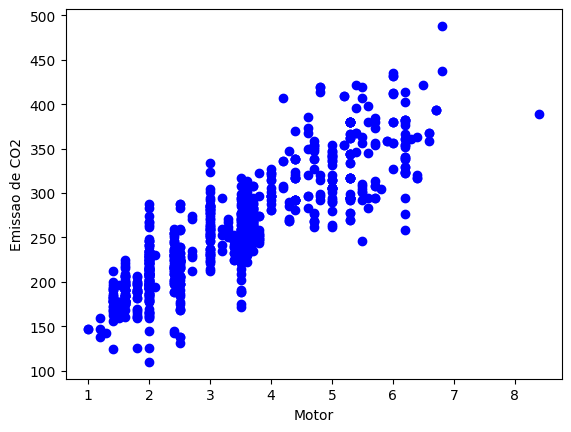

In [10]:
plt.scatter(motores_treino, co2_treino, color='blue')
plt.xlabel('Motor')
plt.ylabel('Emissao de CO2')
plt.show()

Treinando o modelo

In [11]:
#minimizando a soma dos quadrados da diferenca

#Criar um modelo de tipo de regressao linear
modelo = linear_model.LinearRegression()

#Treinar o modelo usando o dataset de teste para encontrar o valor de A e B (Y = A + B * X)
modelo.fit(motores_treino, co2_treino)

LinearRegression()

Exibindo os coeficientes

In [12]:
#Intercept -> de onde a reta vai sair (valor de A)
#Inclinacao -> angulo de inclinacao da seta (valor de B)
print('(A) Intercept: ', modelo.intercept_)
print('(B) Inclinacao: ', modelo.coef_)

(A) Intercept:  [126.28970217]
(B) Inclinacao:  [[38.99297872]]


Exibir a reta de regressao no grafico de treino

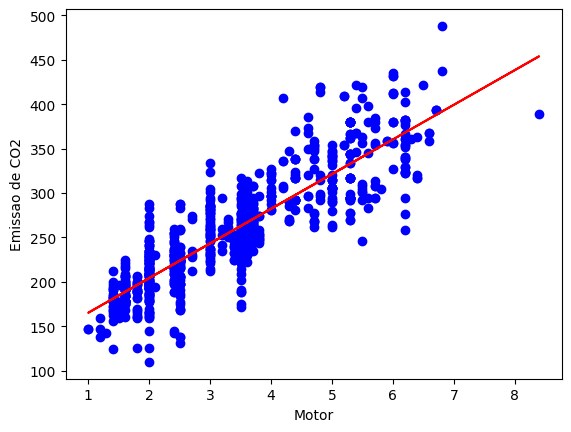

In [15]:
plt.scatter(motores_treino, co2_treino, color='blue')
plt.plot(motores_treino, modelo.coef_[0][0]* motores_treino + modelo.intercept_[0], '-r')
plt.xlabel('Motor')
plt.ylabel('Emissao de CO2')
plt.show()

Executando o modelo no dataset de teste

In [16]:
#Pegando o  modelo e fazendo as predicoes
predicoesCo2 = modelo.predict(motores_teste)

Exibindo os reta de regressao no dataset de teste

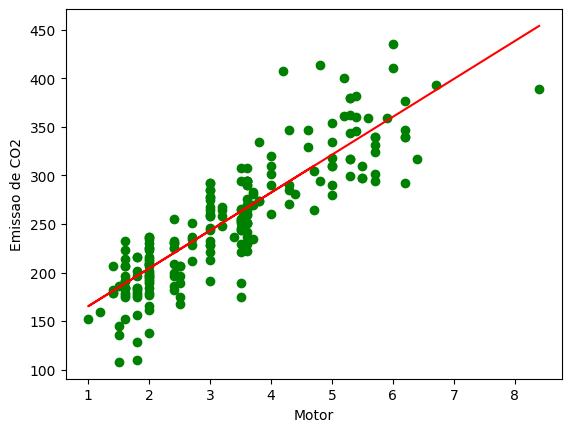

In [17]:
plt.scatter(motores_teste, co2_teste, color='green')
plt.plot(motores_teste, modelo.coef_[0][0]* motores_teste + modelo.intercept_[0], '-r')
plt.xlabel('Motor')
plt.ylabel('Emissao de CO2')
plt.show()

Avaliacao do modelo

In [19]:
#mostrando as metricas
print('Soma dos Erros ao Quadrado (SSE): %2.f' % np.sum((predicoesCo2 - co2_teste) ** 2))
print('Erro Quadratico Medio (MSE): %.2f' % mean_squared_error(co2_teste, predicoesCo2))

# mais usado
print('Erro Medio Absoluto (MAE): %.2f' % mean_absolute_error(co2_teste, predicoesCo2))

#registra mais erro quando ta longe da reta
print('Raiz do Erro Quadratico Medio (RMSE): %.2f' % sqrt(mean_squared_error(co2_teste, predicoesCo2)))

# coeficiente de determinacao, modelo explica uma porcentagem da variancia
print('R2-score: %.2f' % r2_score(predicoesCo2, co2_teste))

Soma dos Erros ao Quadrado (SSE): 210991
Erro Quadratico Medio (MSE): 985.94
Erro Medio Absoluto (MAE): 24.10
Raiz do Erro Quadratico Medio (RMSE): 31.40
R2-score: 0.68
